# Optimizing Instagram Ads with Support Vector Classification

**IMPORTING LIBRARIES , DATASET , DIFFRENTIATING THE DEPENDENT AND INDEPENDENT VARIABLE**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/PREPINSTA /MACHINE LEARNING /4. CLASSIFICATION /DATASET /Instagram Ads SVM.csv")
data_set

,Age,Mobile Phone,Purchased
0,15,6334,0
1,28,6667,0
2,20,14334,0
3,21,19000,0
4,15,25334,0
...,...,...,...
194,28,26334,0
195,34,43000,1
196,42,11334,1
197,37,16667,1


In [ ]:
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

**SPLITING DATA INTO TESTING AND TRAINING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 42)

**APPLYING FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 9.26623146e-01  1.73236151e+00]
 [-5.37020232e-01  1.08344627e+00]
 [-1.71109388e-01  7.58988652e-01]
 [-1.26884192e+00 -1.43110027e+00]
 [ 8.04652865e-01  5.60512207e-02]
 [-7.80960796e-01 -1.40400806e+00]
 [-7.80960796e-01 -9.98436040e-01]
 [-1.71109388e-01 -2.14384204e-01]
 [-1.71109388e-01  1.73236151e+00]
 [ 1.94801457e-01 -2.41395301e-01]
 [-1.71109388e-01 -5.38841823e-01]
 [-4.91391062e-02 -5.21553951e-02]
 [-1.14687164e+00 -1.75555789e+00]
 [-4.91391062e-02  1.94791283e-03]
 [ 4.38742020e-01  1.94791283e-03]
 [-1.51278248e+00 -1.67444349e+00]
 [ 3.16771738e-01 -6.19956228e-01]
 [ 3.16771738e-01 -5.21553951e-02]
 [-4.91391062e-02 -7.91664918e-02]
 [-1.14687164e+00 -9.98436040e-01]
 [-6.58990514e-01 -2.50631839e-02]
 [-1.63475277e+00 -2.14384204e-01]
 [ 1.17056371e+00  1.64176722e-01]
 [ 1.04859343e+00  1.38089279e+00]
 [ 4.38742020e-01  7.58988652e-01]
 [-1.63475277e+00 -1.53922578e+00]
 [-1.14687164e+00  1.02942408e+00]
 [-1.02490136e+00 -5.92864017e-01]
 [ 1.94801457e-01  1

**SUPPORT VECTOR CLASSIFICATION TRAINING ON TRAINING DATASET**


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

**PREDICTING FOR ANY NEW person**

In [ ]:
print(classifier.predict(sc.transform([[32,45000]])))

[1]


**PREDICTING THE Y_PREDICTION VALUES AND Y_TESTING VALUES # Test set result**

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1 )), 1))

[[1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]]


**CHEAKING THE CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# here 40 times given loan and 28 times we predicted wrongly

[[37  3]
 [ 4 16]]
Accuracy: 0.8833333333333333


**VISUALIZING TRAINING SET RESULT**

<ipython-input-14-b60cd55ab729>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


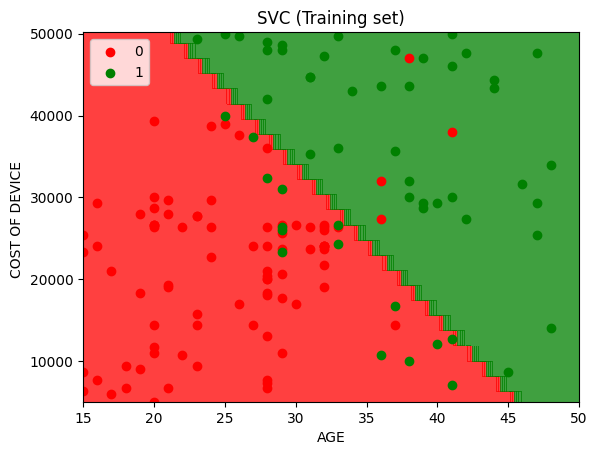

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('AGE')
plt.ylabel('COST OF DEVICE ')
plt.legend()
plt.show()

**VISUALIZING TEST SET RESULT**

<ipython-input-15-62e23823ccc8>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


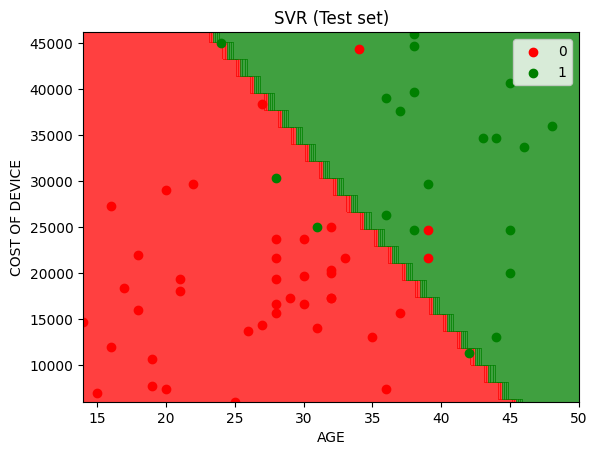

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVR (Test set)')
plt.xlabel('AGE')
plt.ylabel('COST OF DEVICE')
plt.legend()
plt.show()